In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Question 1


# Import the dataset from this address.
Assign it to a variable called users

In [4]:
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


# Discover what is the mean age per occupation

In [5]:
occupation = users.groupby('occupation')
occupation['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

# Discover the Male ratio per occupation and sort it from the most to the least

In [7]:
def gender_to_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0
users['gender_num'] = users['gender'].apply(gender_to_numeric)
male = users.groupby('occupation')['gender_num'].sum() / users['occupation'].value_counts() *100
male.sort_values(ascending=False)


doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

# For each occupation, calculate the minimum and maximum ages

In [25]:
occupation['age'].max()

occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64

In [26]:
occupation['age'].min()

occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64

# For each combination of occupation and sex, calculate the mean age

In [50]:
users.groupby(['occupation', 'gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

# For each occupation present the percentage of women and men

# Question 2


# Step 1. Import the necessary libraries ,Import the dataset from this address, Assign it to a variable called euro12

In [73]:
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv", sep=',')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


# Select only the Goal column

In [75]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

# How many team participated in the Euro2012?

In [76]:
len(euro12.index)

16

In [77]:
euro12.shape[0]

16

# What is the number of columns in the dataset?

In [78]:
euro12.shape[1]

35

# View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [81]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


# Sort the teams by Red Cards, then to Yellow Cards

In [83]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


# Calculate the mean Yellow Cards given per Team

In [84]:
discipline['Yellow Cards'].mean()

7.4375

# Filter teams that scored more than 6 goals

In [87]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


# Select the teams that start with G

In [96]:
euro12[euro12['Team'].str[0] == 'G']

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


# Select the first 7 columns

In [99]:
euro12.iloc[: ,0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


# Select all columns except the last 3

In [102]:
euro12.iloc[: , :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


# Present only the Shooting Accuracy from England, Italy and Russia

In [121]:
shooting = euro12[['Team', 'Shooting Accuracy']]
shooting[shooting['Team'].isin(['England', 'Italy', 'Russia'])]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3
Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000

In [128]:
s1 = pd.Series(np.random.randint(1,5, size=100))
s2 = pd.Series(np.random.randint(1,4, size=100))
s3 = pd.Series(np.random.randint(10000,30001, size=100))

# Create a DataFrame by joinning the Series by column

In [130]:
df = pd.concat([s1,s2,s3], axis=1)
df.head()

,0,1,2
0,1,1,28200
1,3,3,22250
2,1,1,22040
3,3,2,15027
4,3,2,15122


# Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [131]:
df.rename(columns = {0: 'bedrs', 1: 'bathrs', 2:'price_sqr_meter'}, inplace=True)
df.head()

,bedrs,bathrs,price_sqr_meter
0,1,1,28200
1,3,3,22250
2,1,1,22040
3,3,2,15027
4,3,2,15122


# Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [141]:
bigcolumn = pd.concat([s1,s2,s3], axis = 0)
bigcolumn = bigcolumn.to_frame()
bigcolumn

,0
0,1
1,3
2,1
3,3
4,3
...,...
95,16028
96,23285
97,23717
98,18602


# Ops it seems it is going only until index 99. Is it true?

Yes

# Reindex the DataFrame so it goes from 0 to 299

In [142]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

,0
0,1
1,3
2,1
3,3
4,3
...,...
295,16028
296,23285
297,23717
298,18602


# Question 4
Wind Statistics

# Import the dataset from the attached file wind.txt
# Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [231]:
data = pd.read_csv('wind.txt', sep='\s+', parse_dates = [[0,1,2]])
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [232]:
import datetime

# Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [233]:
def fix_year(x):
    if x.year > 1979:
        year = x.year - 100
    else:
        year = x.year
    return datetime.date(year, x.month, x.day)

In [234]:
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_year)
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


# Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [235]:
data['Yr_Mo_Dy'] = pd.to_datetime(data['Yr_Mo_Dy'])

data = data.set_index('Yr_Mo_Dy')

data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


# Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [203]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

# Compute how many non-missing values there are in total.

In [204]:
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

# Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
A single number for the entire dataset.

# Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
A different set of numbers for each location.

In [221]:
loc_stats = data.describe()
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,11.190000,11.630000,16.880000,19.830000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


# Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
A different set of numbers for each day.

In [222]:
day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)

day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


# Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.

In [223]:
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

# Downsample the record to a yearly frequency for each location.

In [236]:
data.groupby(data.index.year).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


# Downsample the record to a monthly frequency for each location.

In [241]:
data.groupby(data.index.month).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1,14.847325,12.914560,13.299624,7.199498,11.667734,8.054839,11.819355,9.512047,9.543208,10.053566,14.550520,18.028763
2,13.710906,12.111122,12.879132,6.942411,11.551772,7.633858,11.206024,9.341437,9.313169,9.518051,13.728898,17.156142
3,13.158687,11.505842,12.648118,7.265907,11.554516,7.959409,11.310179,9.635896,9.700324,10.096953,13.810609,16.909317
4,12.555648,10.429759,12.204815,6.898037,10.677667,7.441389,10.221315,8.909056,8.930870,9.158019,12.664759,14.937611
5,11.724032,10.145619,11.550394,6.307487,10.224301,6.942061,8.797738,8.452903,8.040806,8.524857,12.767258,13.736039
6,10.451317,8.949704,10.361315,5.652278,9.529926,6.410093,8.009556,7.920796,7.639796,7.729185,12.246407,12.861818
7,9.992007,8.357778,9.349642,5.416935,9.302634,5.972348,7.843501,7.262760,7.544480,7.321416,11.676505,12.800789
8,10.213411,8.415143,9.993441,5.270681,8.901559,5.891057,7.772312,6.842025,7.240573,7.002783,11.110090,12.565943
9,11.458519,9.981002,10.756883,5.615176,9.766315,6.566222,8.609722,7.745677,7.610556,7.689278,12.686389,14.761963


# Downsample the record to a weekly frequency for each location.

# Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

# Question 5
Import the necessary libraries

Import the dataset from this address.

Assign it to a variable called chipo.

See the first 10 entries

In [246]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep = '\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


# What is the number of observations in the dataset?

In [247]:
chipo.shape[0]

4622

# Print the name of all the columns.

In [248]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

# How is the dataset indexed?

In [249]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

# Which was the most-ordered item?

In [257]:
chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


# For the most-ordered item, how many items were ordered?

761

# What was the most ordered item in the choice_description column?

In [259]:
chipo.groupby('choice_description').sum().sort_values(['quantity'], ascending = False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


# How many items were orderd in total?

In [260]:
chipo['quantity'].sum()

4972

# Turn the item price into a float
• Check the item price type

• Create a lambda function and change the type of item price

• Check the item price type

In [266]:
chipo['item_price'].dtype

dtype('O')

In [270]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

In [271]:
chipo['item_price'].dtype

dtype('float64')

# How much was the revenue for the period in the dataset?

In [273]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


In [274]:
chipo['revenue'].sum()

39237.02

# How many orders were made in the period?

In [277]:
chipo['order_id'].nunique()

1834

# What is the average revenue amount per order?

In [285]:
chipo.groupby('order_id')['revenue'].sum().mean()

21.394231188658654

# How many different items are sold?

In [286]:
chipo['item_name'].nunique()

50

# Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [2]:
marriage = pd.read_csv('us-marriages-divorces-1867-2014.csv')
marriage.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


In [3]:
marriage['marriages_per_capita'] = marriage['Marriages'] / marriage['Population']
marriage['divorces_per_capita'] = marriage['Divorces'] / marriage['Population']
marriage.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000,marriages_per_capita,divorces_per_capita
0,1867,357000.0,10000.0,36970000,9.7,0.3,0.009656,0.000270
1,1868,345000.0,10000.0,37885000,9.1,0.3,0.009107,0.000264
2,1869,348000.0,11000.0,38870000,9.0,0.3,0.008953,0.000283
3,1870,352000.0,11000.0,39905000,8.8,0.3,0.008821,0.000276
4,1871,359000.0,12000.0,41010000,8.8,0.3,0.008754,0.000293


Text(0.5, 0, 'Marriage/Divorce per Capita')

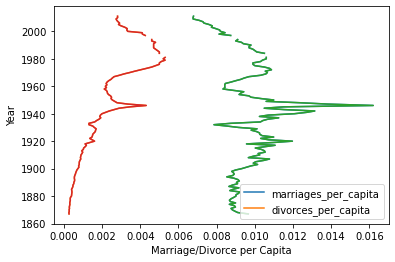

In [22]:
fig, ax = plt.subplots()
columns = marriage[['marriages_per_capita','divorces_per_capita']]
for column in columns:
    ax.plot(columns,marriage['Year'])
ax.legend(columns)
ax.set_ylabel('Year')
ax.set_xlabel('Marriage/Divorce per Capita')


# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

In [32]:
df = marriage[marriage['Year']== 1900]
df.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000,marriages_per_capita,divorces_per_capita
33,1900,709000.0,56000.0,76094000,9.3,0.7,0.009317,0.000736


<AxesSubplot:>

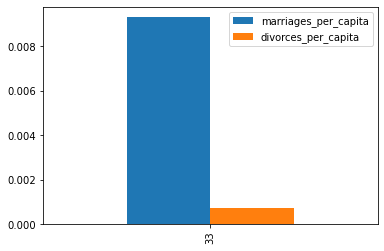

In [33]:
df[['marriages_per_capita','divorces_per_capita']].plot.bar()

<AxesSubplot:>

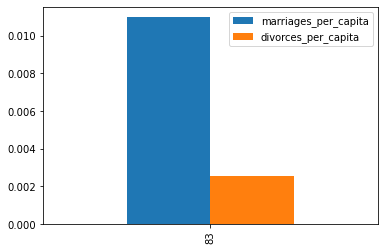

In [34]:
df1 = df = marriage[marriage['Year']== 1950]
df1[['marriages_per_capita','divorces_per_capita']].plot.bar()

<AxesSubplot:>

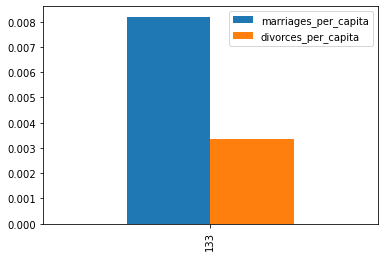

In [35]:
df2 = marriage[marriage['Year']== 2000]
df2[['marriages_per_capita','divorces_per_capita']].plot.bar()


# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

In [78]:
actor = pd.read_csv('actor_kill_counts.csv', index_col = 'Actor')
actor.head()

,Count
Actor,
Arnold Schwarzenegger,369
Chow Yun-Fat,295
Clint Eastwood,207
Clive Owen,194
Dolph Lundgren,239


Text(0.5, 0, 'Kill Count')

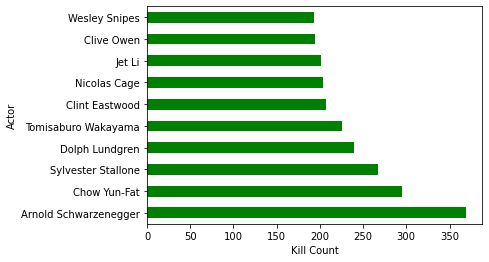

In [135]:
actor['Count'].sort_values(ascending=False).plot.barh(colormap='ocean')
plt.xlabel('Kill Count')

# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [112]:
emperor = pd.read_csv('roman-emperor-reigns.csv')
emperor.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [116]:
emperor['Cause_of_Death'].unique()

array(['Possibly assassinated', 'Assassinated', 'Suicide',
       'Natural causes', 'Illness', 'Executed', 'Killed in battle',
       'Died in captivity'], dtype=object)

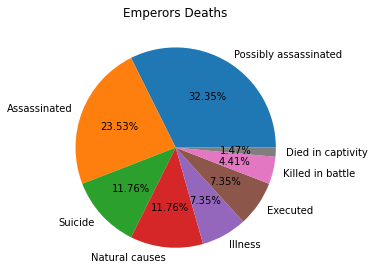

In [140]:
labels = ['Possibly assassinated', 'Assassinated', 'Suicide',
       'Natural causes', 'Illness', 'Executed', 'Killed in battle',
       'Died in captivity']
plt.pie(emperor['Cause_of_Death'].value_counts(), labels=labels, autopct='%1.2f%%')
plt.title('Emperors Deaths')
plt.tight_layout()
plt.show()

# Question 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

In [141]:
arcade = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
arcade.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

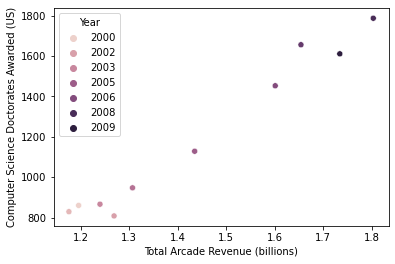

In [148]:
sns.scatterplot(data= arcade, x= 'Total Arcade Revenue (billions)', y= 'Computer Science Doctorates Awarded (US)', hue='Year')